# QUESTION ONE

    • DOMAIN: Electronics and Telecommunication

    • CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
    
    • DATA DESCRIPTION: The data set contains information on various signal tests performed:
    
        1. Parameters: Various measurable signal parameters.
        
        2. Signal_Quality: Final signal strength or quality
        
        
    • PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].
    
        Steps and tasks:
            1. Import data.
            
            2. Data analysis & visualisation
            
                • Perform relevant and detailed statistical analysis on the data.
                • Perform relevant and detailed uni, bi and multi variate analysis.
                
                Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.
                
            3. Design, train, tune and test a neural network regressor.
            Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
            
            4. Pickle the model for future use.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs
import math
from tensorflow.keras.utils import to_categorical
import cv2
import h5py
from keras.layers import Dense, Activation, LeakyReLU
from keras.models import model_from_json


In [2]:

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Import data.

In [3]:
df1 = pd.read_csv('Part-+1%2C2%263+-+Signal.csv')
df1.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### 2. Data analysis & visualisation

#### • Perform relevant and detailed statistical analysis on the data.
#### • Perform relevant and detailed uni, bi and multi variate analysis.
                
**Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.**

In [4]:
df1.shape

(1599, 12)

**The data has 1599. rows and 12 columns**

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**All the parameters are float values and non-null**

**Signal strength is having int values**

In [6]:
null_counts = df1.isnull().sum() 
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


**No null Data**

In [7]:
df1.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**1. All the parameter values are very diversed and different ranges, we need to normalise it**

**2. Signal strength is between 3 to 8 and 50 and 75 percentile being 6**

**3. Parameter 3 ranges between 0 and 1.** 

**4. Maximum value of Parameter 5 is 0.611** 

**5. Parameter 8 has a very low range between 0.99 and 1.004**

**6. Standard deviation is lowest for Parameter 8, it is 0.001887**

**Lets visualise the data to get better understanding of data**

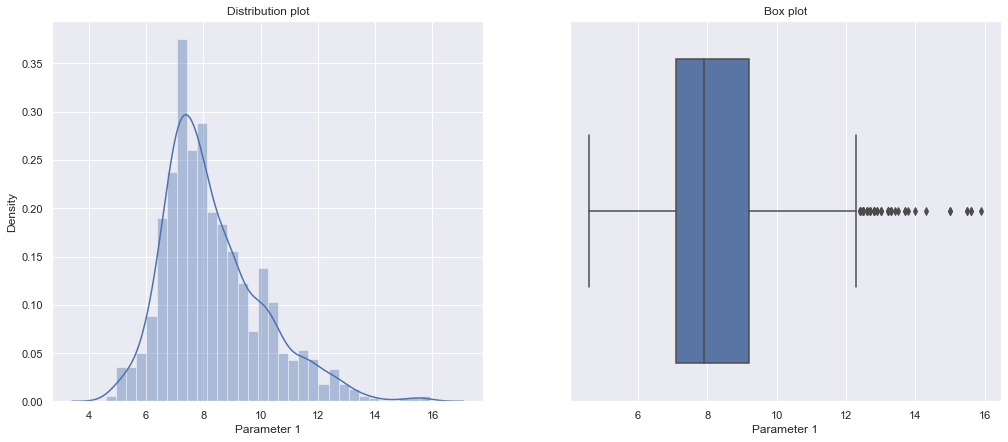

Total Number of outliers in Parameter 1: 49


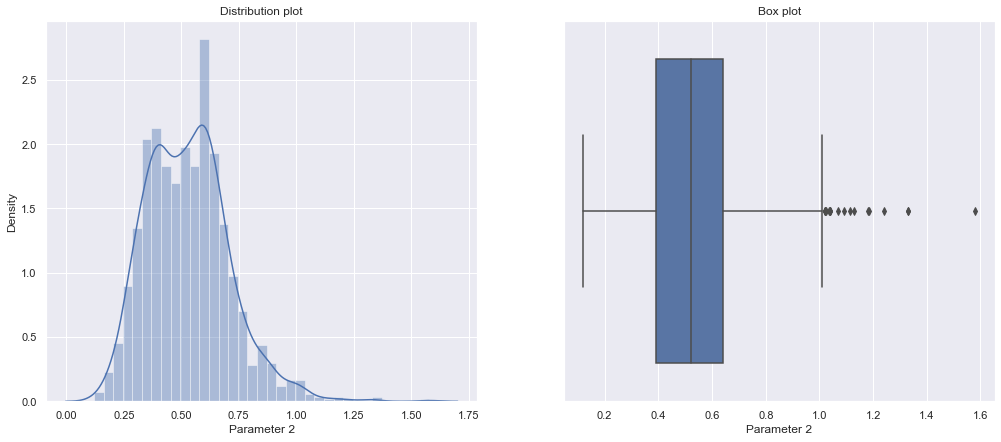

Total Number of outliers in Parameter 2: 19


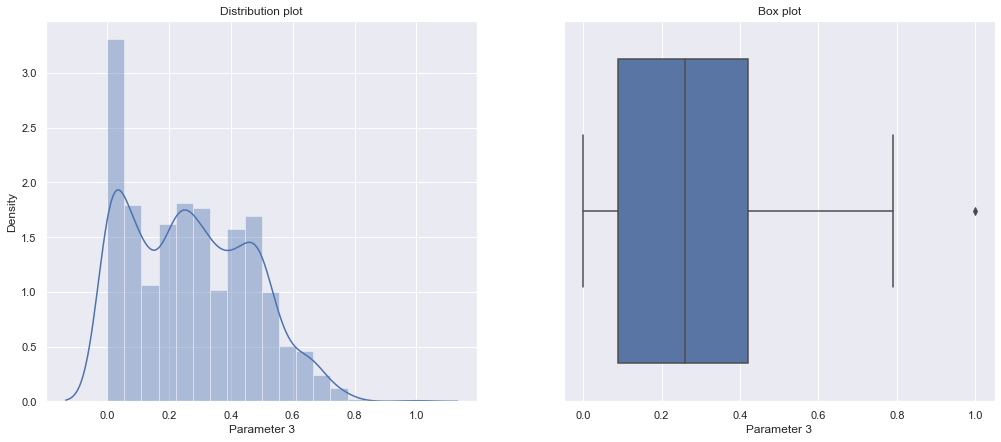

Total Number of outliers in Parameter 3: 1


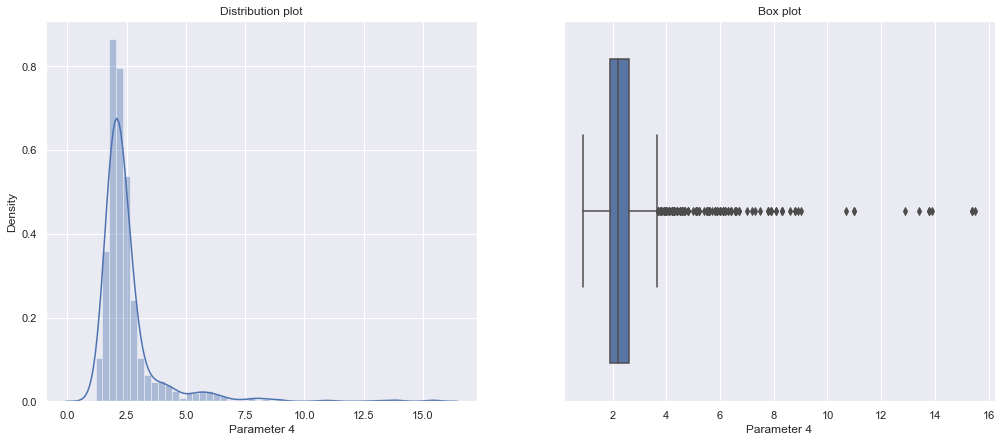

Total Number of outliers in Parameter 4: 155


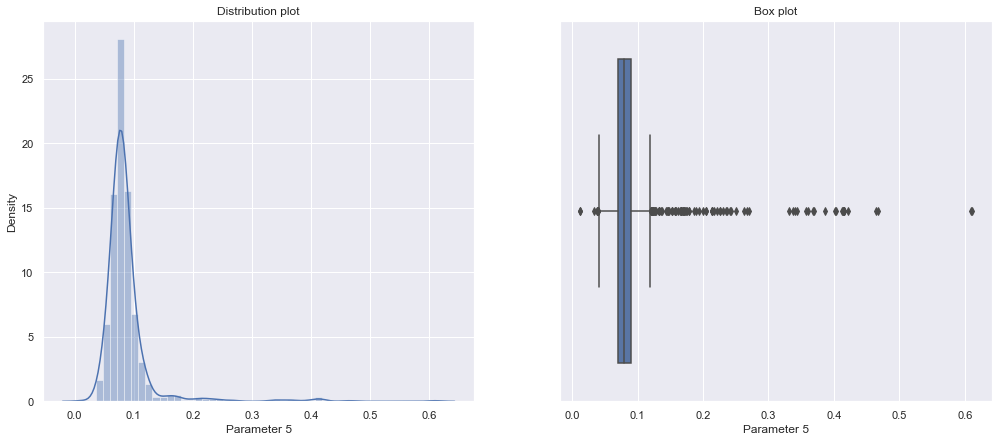

Total Number of outliers in Parameter 5: 112


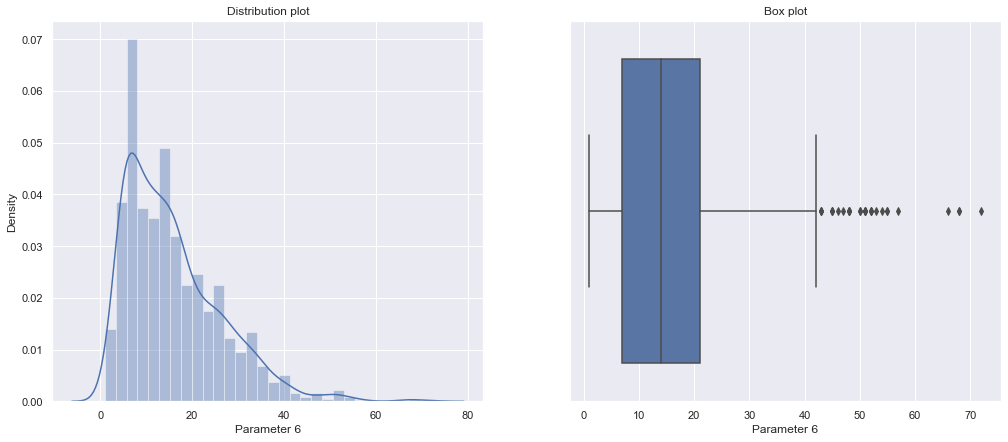

Total Number of outliers in Parameter 6: 30


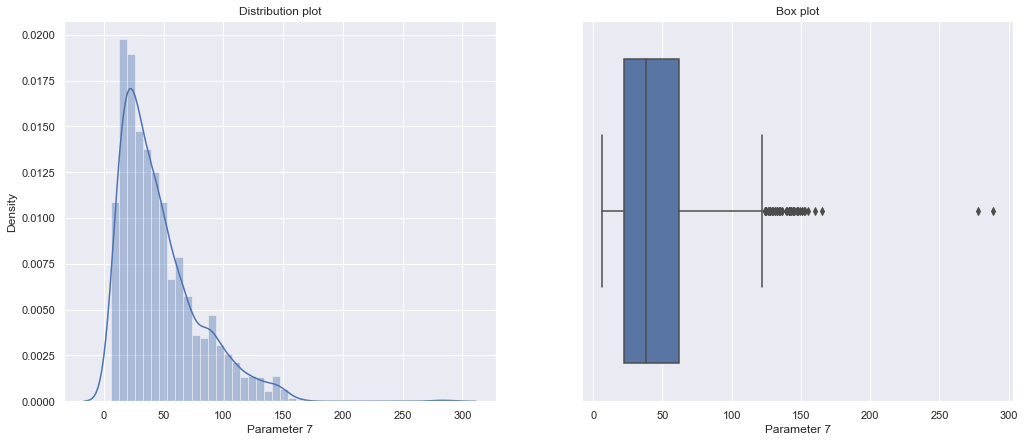

Total Number of outliers in Parameter 7: 55


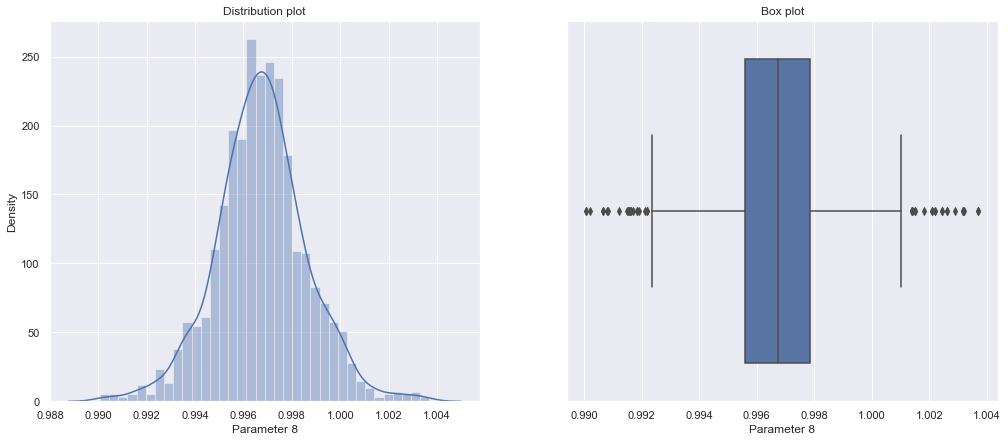

Total Number of outliers in Parameter 8: 45


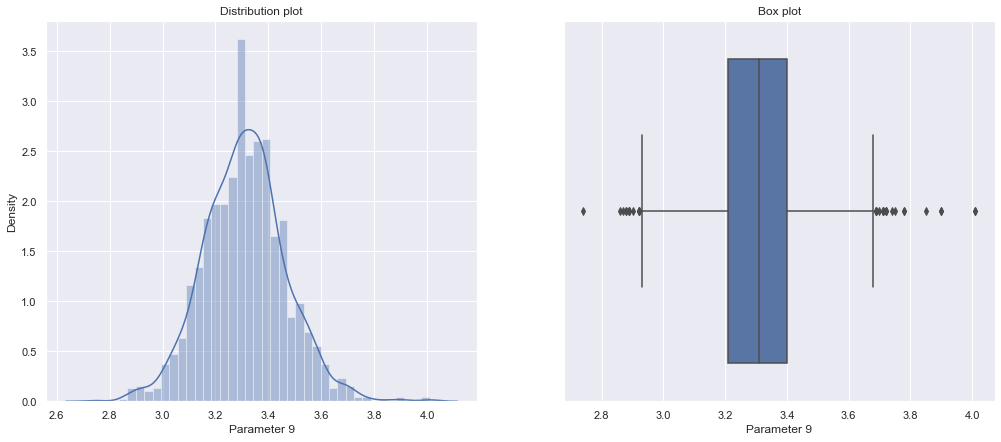

Total Number of outliers in Parameter 9: 35


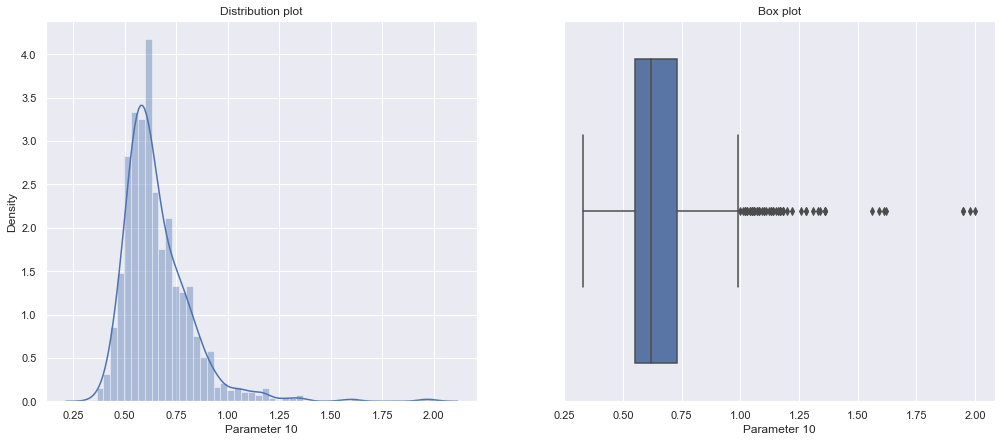

Total Number of outliers in Parameter 10: 59


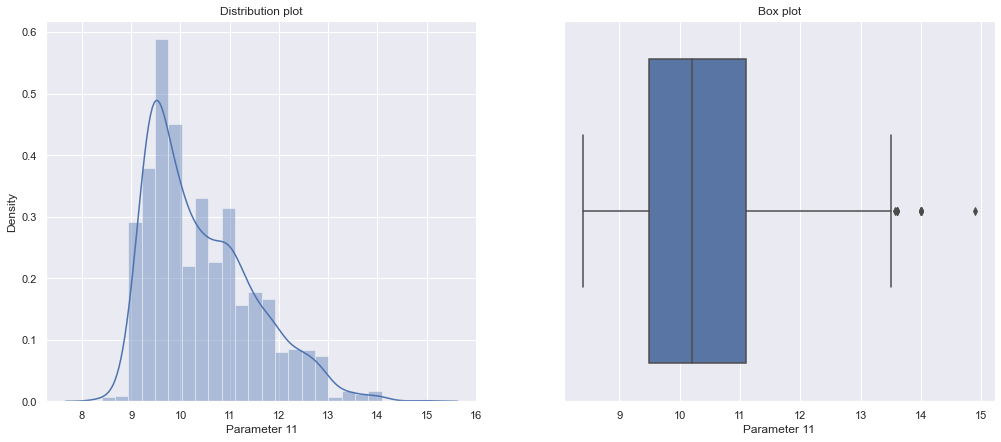

Total Number of outliers in Parameter 11: 13


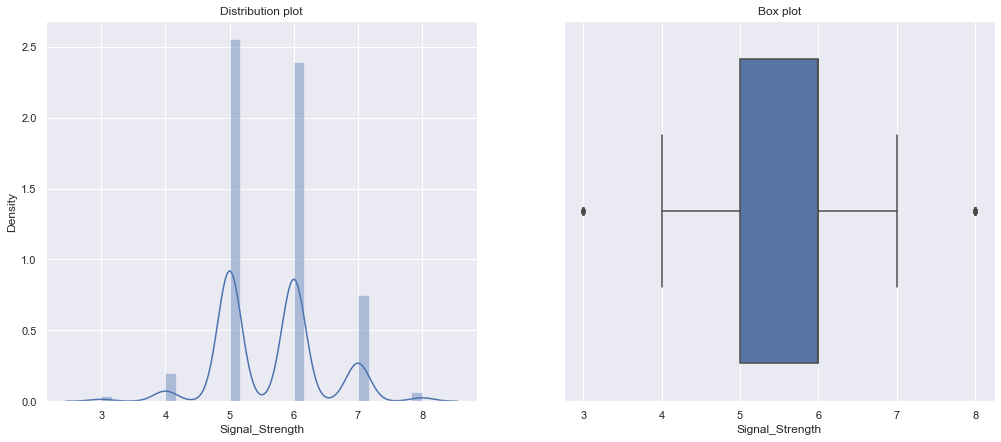

Total Number of outliers in Signal_Strength: 28


In [8]:
def univariate_analysis_boxplot_distplot(dataset, criteria):
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = criteria, data=dataset,  orient='h' , ax=axes[1])
    sns.distplot(dataset[criteria],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(dataset[criteria],25),np.percentile(dataset[criteria],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dataset[criteria] if i < lower or i > upper]
    
    print(f'Total Number of outliers in {criteria}: {len(Outliers)}')       
    
col_list=list(df1.select_dtypes(include=['int64','float64']).columns)

for column in col_list:
    univariate_analysis_boxplot_distplot(df1, column)

**Here we can see that lots of input parameter have very huge outliers like Parameter 4 and 5 where parameter 4 has highest outliers 155.**

**We can see skewneess in parameters like 4,5,6,7,10,11**

**Mean, median and mode are almost overlapping or too close to each other except in Parameter 7 Parameter 3 is trimodal and Signal strength is a classification variable.**

**Signal strength 5 has highest count**

**All of them are positively skewed**



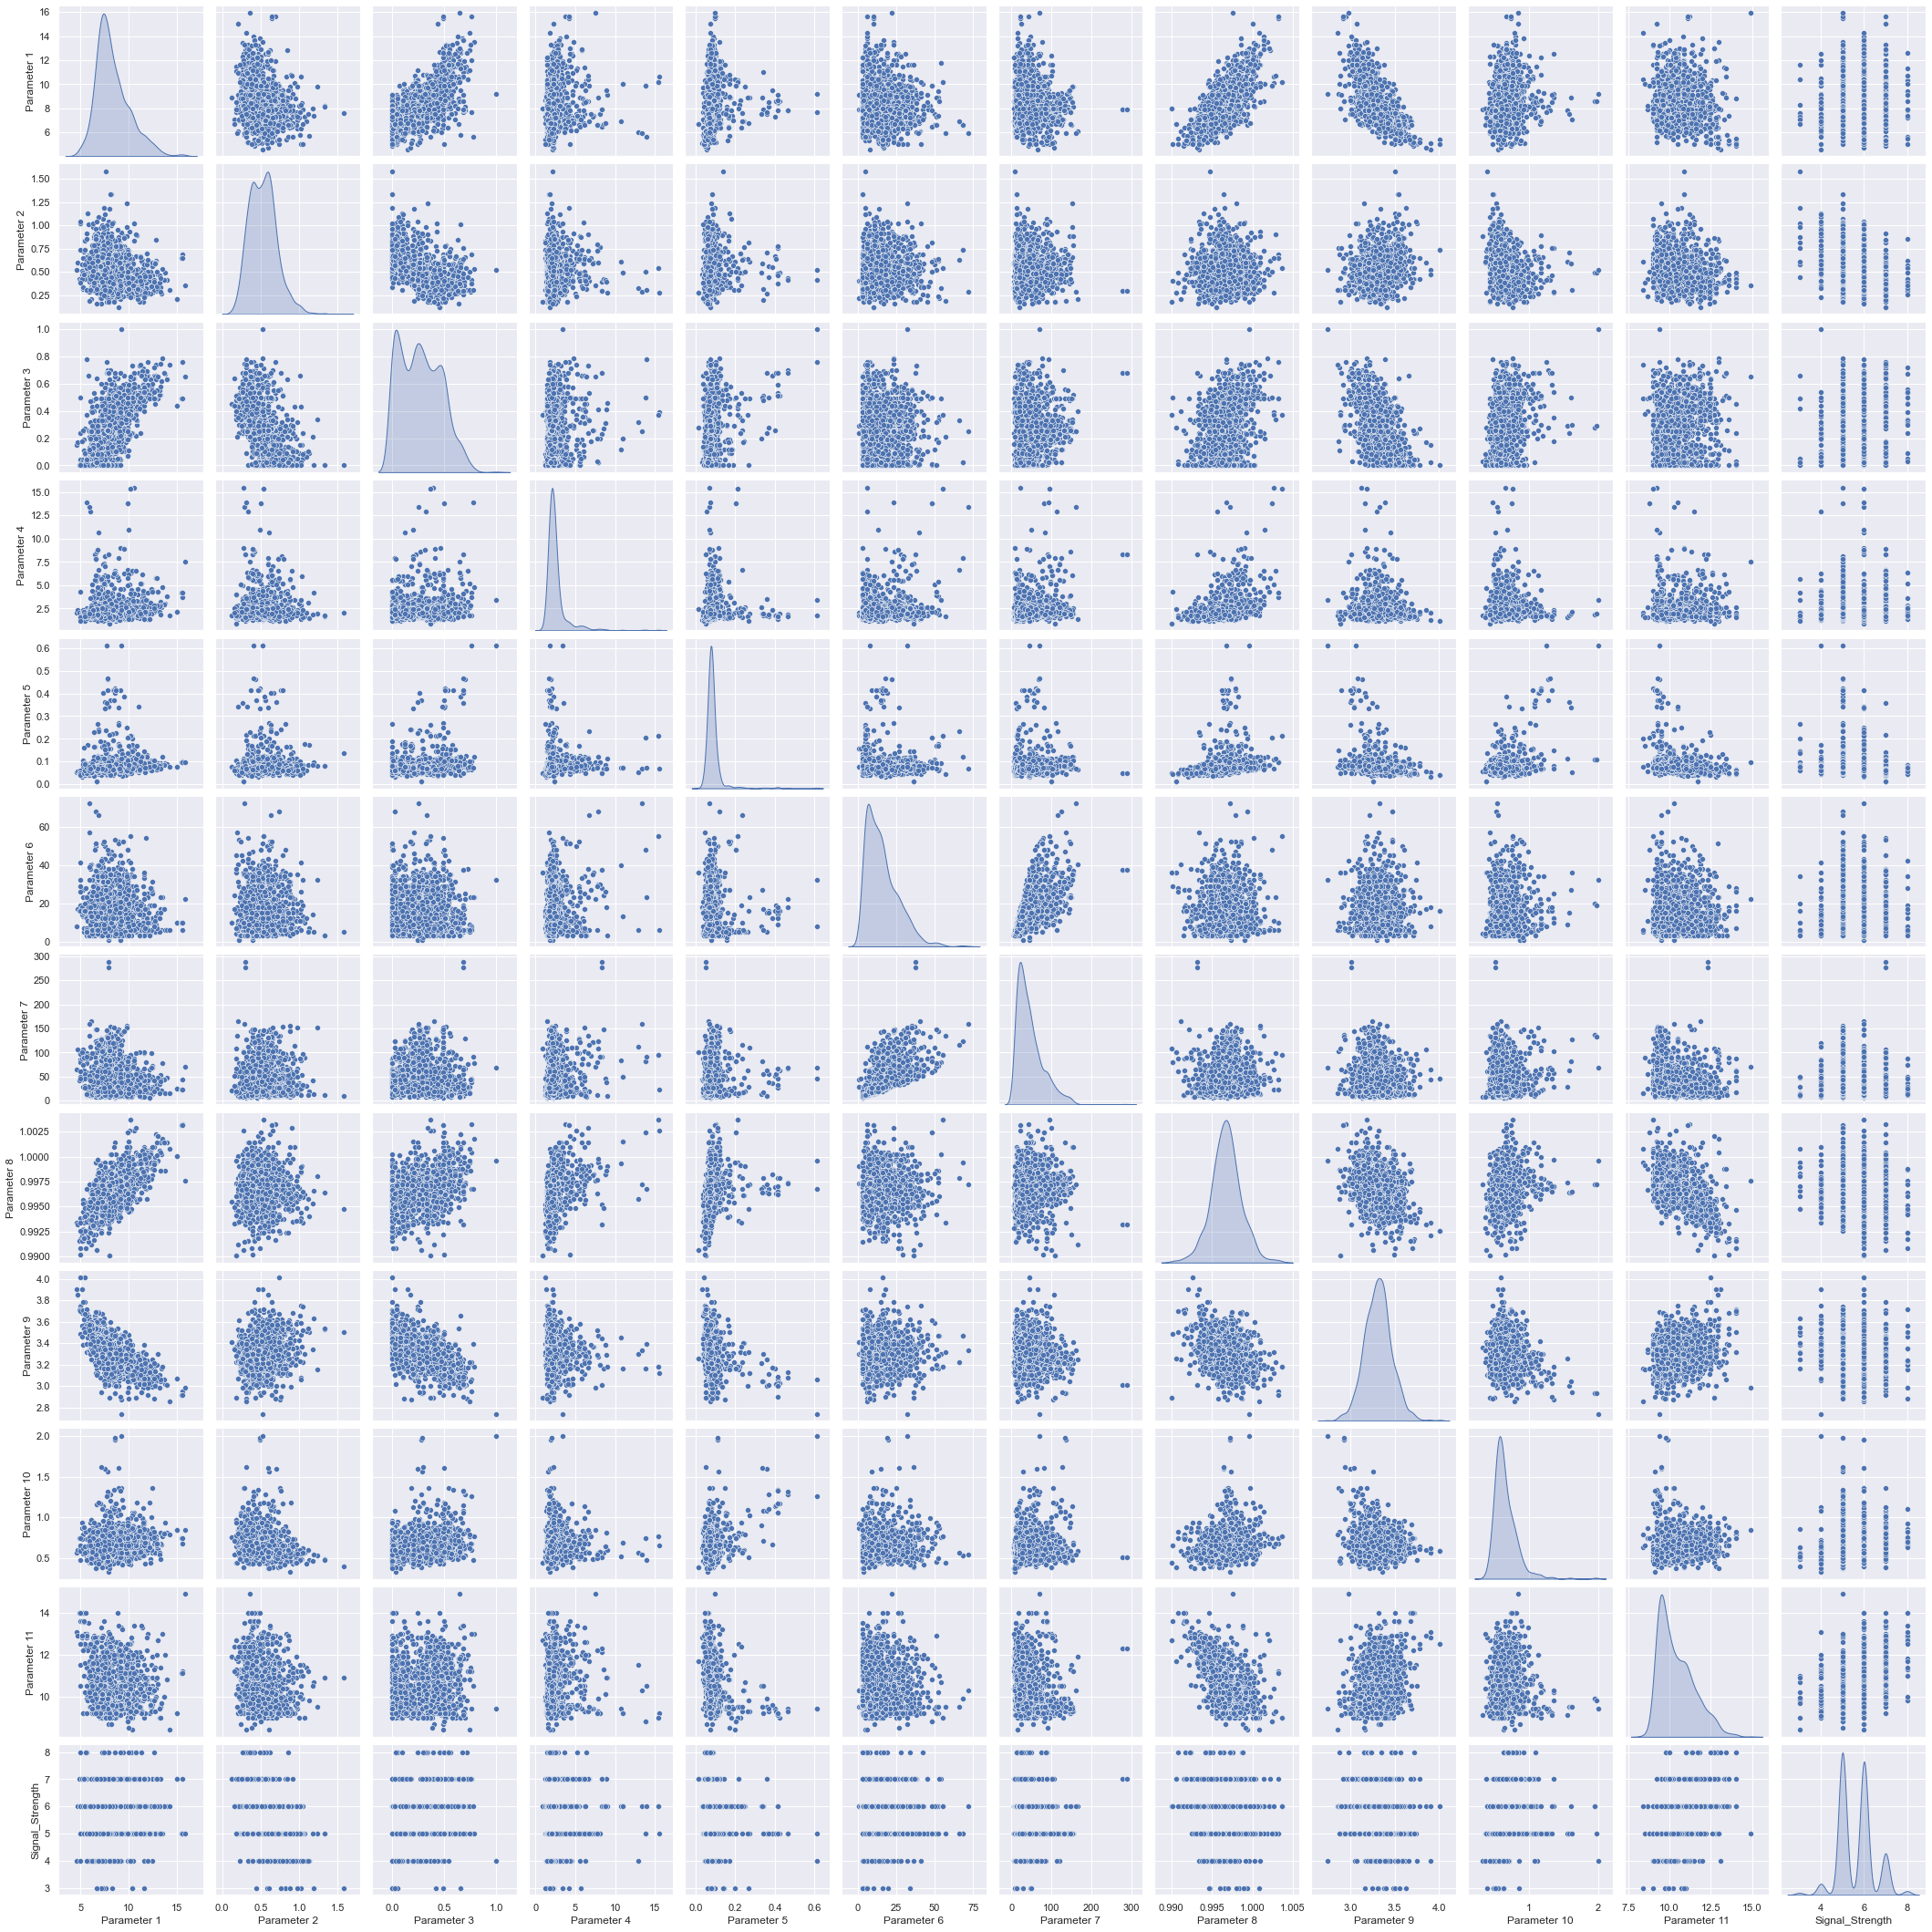

In [9]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

<AxesSubplot:>

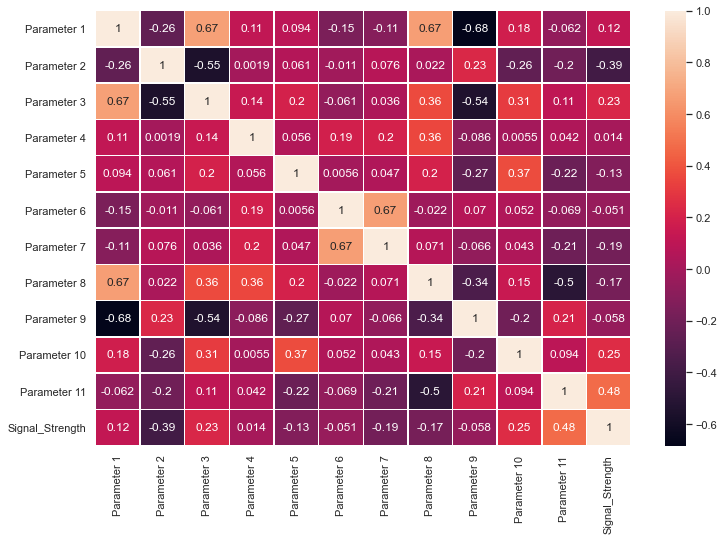

In [10]:
corr=df1.corr()
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

**Parameter 6 and Parameter 7 are highly correlated with each other**

**Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9.**

**But since, the correlation is not too high near 0.8 or above not dropping the features.**

[0.07780652 0.09895707 0.08125565 0.07866342 0.07727342 0.07304882
 0.10125584 0.08460088 0.07481428 0.10360727 0.14871682]


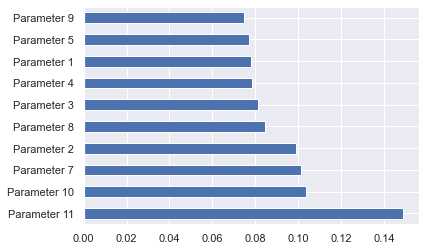

In [11]:
# Feature Importance

# Independent variables
X=df1.drop('Signal_Strength',axis=1)      

# Target variable
Y=df1['Signal_Strength']                   


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#plotting graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Observation: Most Effective - Parameter 11

**Here Parameter 11 is the most important feature**

### 3. Design, train, tune and test a neural network regressor.
            
**Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.**
 

In [12]:
# Independent variables
X=df1.drop('Signal_Strength',axis=1)

# Target variable
Y=df1['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [13]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)  

In [14]:
# Confirming Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [15]:
Y_Train_c = to_categorical(Y_Train)
Y_Test_c = to_categorical(Y_Test)

In [16]:
X_Train_S

array([[-0.30880165,  0.35380627,  0.29429778, ..., -0.38772674,
        -0.69557817, -0.95076346],
       [ 1.40949297, -0.42983985,  0.29429778, ..., -0.45309758,
         0.29818702,  0.34581493],
       [ 0.32123971, -1.21348597,  1.51891214, ..., -0.32235591,
        -0.75403495, -0.67292523],
       ...,
       [-0.65246057,  0.24185682, -1.13441898, ...,  0.4620941 ,
        -0.34483752, -0.11724878],
       [-0.76701355,  0.91355349, -1.38954698, ...,  0.2659816 ,
        -0.34483752, -0.67292523],
       [ 0.95128107, -1.15751124,  1.62096334, ..., -0.71458091,
         0.70738446, -0.76553797]])

In [17]:
Y_Train

195     5
812     5
185     5
789     5
103     5
       ..
432     6
1283    6
1265    6
1277    6
1414    5
Name: Signal_Strength, Length: 1119, dtype: int64

### REGRESSOR

In [18]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam')
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [19]:
Network_Regressor=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=200, batch_size=200)


Epoch 1/200
6/6 [==============================] - 0s 27ms/step - loss: 5.6282 - val_loss: 5.6269
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6099 - val_loss: 5.5993
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 5.5717 - val_loss: 5.5383
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4851 - val_loss: 5.3996
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 5.2901 - val_loss: 5.0933
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 4.8726 - val_loss: 4.4497
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 4.0177 - val_loss: 3.1971
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 2.5373 - val_loss: 1.6478
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 1.7233 - val_loss: 1.8473
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 1.7133 - val_loss: 1.3658
Epoch 11/200
6/6 [==========

In [20]:
score = NN_model_Regressor.evaluate(X_Train_S, Y_Train, verbose=0)
print(score)

0.43956243991851807


In [21]:
score = NN_model_Regressor.evaluate(X_Test_S, Y_Test, verbose=0)
print(score)

0.4663657546043396


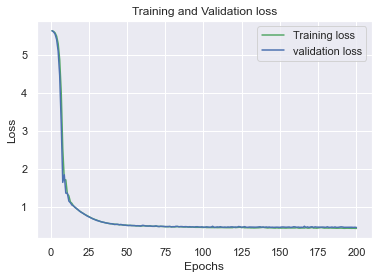

In [22]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,200+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **For the regressor the final training loss is approx 0.43 and test loss: 0.46**

## CLASSIFIER

In [23]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 9)                

In [24]:
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train_c, validation_data=(X_Test_S,Y_Test_c), epochs=200, batch_size=200)



Epoch 1/200
6/6 [==============================] - 1s 25ms/step - loss: 0.1974 - accuracy: 0.4039 - val_loss: 0.1972 - val_accuracy: 0.4354
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.4218 - val_loss: 0.1968 - val_accuracy: 0.4354
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1967 - accuracy: 0.4218 - val_loss: 0.1962 - val_accuracy: 0.4354
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1958 - accuracy: 0.4218 - val_loss: 0.1947 - val_accuracy: 0.4354
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1939 - accuracy: 0.4218 - val_loss: 0.1913 - val_accuracy: 0.4354
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1893 - accuracy: 0.4218 - val_loss: 0.1830 - val_accuracy: 0.4354
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1780 - accuracy: 0.4218 - val_loss: 0.1642 - val_accuracy: 0.4354
Epoch 8/200
6/6 [=========

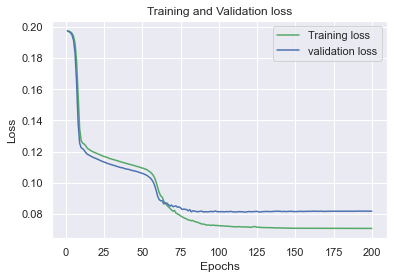

In [25]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,200+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

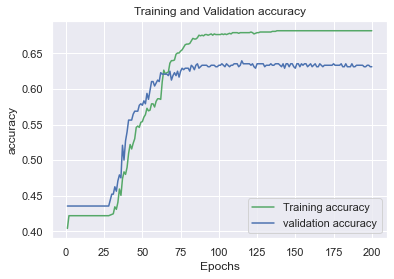

In [26]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,200+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
score = NN_model_Classifier.evaluate(X_Train_S, Y_Train_c, verbose=0)
print(score)

[0.0707448348402977, 0.6818587779998779]


In [28]:
score = NN_model_Classifier.evaluate(X_Test_S, Y_Test_c, verbose=0)
print(score)

[0.08177787810564041, 0.6312500238418579]


## **Finally Train accuracy around 68.1% and Test accuracy is arounf 63.1% approx.**

### 4. Pickle the model for future use.

In [29]:
# Pickle model to JSON
Regressor_model_json = NN_model_Regressor.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(Regressor_model_json)
# Pickle weights to HDF5
NN_model_Regressor.save_weights("Regressor_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Regressor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Regressor_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='mean_absolute_error', optimizer='adam')
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("LOSS : "+ str(score))

Saved model to disk
Loaded model from disk
LOSS : 0.4663657546043396


In [30]:
#summary of Regressor model
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [31]:
# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test_c, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 63.13%


In [32]:
#summary of classification model
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 9)                

# CONCLUSION 

### REGRESSOR: 

**For the regressor the final training loss is approx 0.43 and test loss: 0.46**


### CLASSIFIER : 

**Finally Train accuracy around 68.1% and Test accuracy is arounf 63.1% approx.**.**



**We can see that after certain number of epochs, the test accuracy and loss remains constant**

**Though the train accuracy is increasing the testing accuracy is becoming constant after certain number of epochs**

**Though the train loss is decreasing the testing loss is becoming constant after certain number of epochs**

**Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.**

**Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.**

====================================================================================================================
# END PART ONE
====================================================================================================================

# QUESTION TWO

    • DOMAIN: Autonomous Vehicles
    
    
    • BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
    
    The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
    While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
    
    The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
    
    
    • DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
    
    Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.
    
    • PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset.
        Steps and tasks:
            1. Import the data.
            2. Data pre-processing and visualisation.
            3. Design, train, tune and test a neural network image classifier.
            Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
            4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

### 1. Import the data.

In [33]:
h5f = h5py.File( 'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

**Data import is complete and closed the file**

### 2. Data pre-processing and visualisation.

In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


**Here we have the size of the data as X_train shape: (42000, 32, 32) and X_test shape: (18000, 32, 32)**

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


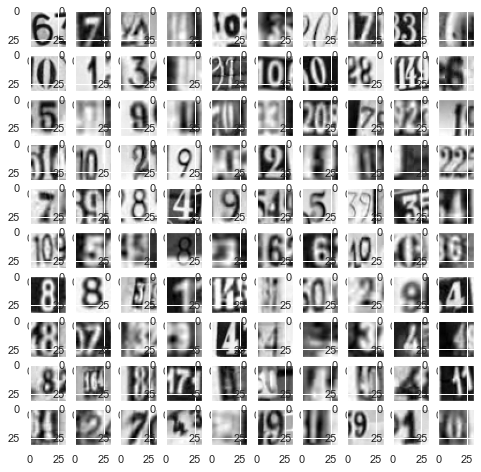

In [35]:
columns=10
rows=10

fig=plt.figure(figsize=(8, 8))

for i in range(1,columns*rows+1):
    img=X_train[i]
    fig.add_subplot(rows,columns,i)
    print(y_train[i],end='   ')
    if i % columns == 0:
        print ("")
    plt.imshow(img,cmap='gray')

plt.show()

**Create a resized dataset for training and testing inputs with corresponding size**

**Here we are resizing it to 28X28**

In [36]:
X_train_resized=np.zeros((X_train.shape[0],28,28))
for i in range(X_train.shape[0]):
    #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
    X_train_resized[i,:,:]=cv2.resize(X_train[i],dsize=(28,28),interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
    #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
    X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
# We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del(X_train, X_test)

In [37]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28, 1)

In [38]:
X_train = X_train.reshape(42000, 784)
print(X_train.shape)
X_test = X_test.reshape(18000, 784)
print(X_test.shape)

(42000, 784)
(18000, 784)


In [39]:
del(X_train_resized, X_test_resized)


In [40]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [41]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 784)
X_test shape: (18000, 784)
Images in X_train: 42000
Images in X_test: 18000


In [42]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

Label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


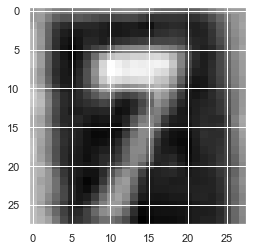

In [43]:
print("Label: ", y_train[2])
plt.imshow(X_train[2].reshape(28,28), cmap='gray')

**Here we have processed the data via resizing, scaling, categorising and so on**

**Lets proceed for model building**

### 3. Design, train, tune and test a neural network image classifier.

**Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.**

In [44]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

In [45]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

**Let try the iterate over the learning rate from 10^-7 to 10^3 and lambda from 10^-7 to 10^-2 randomly and try to pick the best learning rate and lambda**

In [46]:
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 0s 5ms/step - loss: 2.3646 - accuracy: 0.1053
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3640 - accuracy: 0.1054
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3633 - accuracy: 0.1053
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3627 - accuracy: 0.1052
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3620 - accuracy: 0.1052
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3614 - accuracy: 0.1050
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3608 - accuracy: 0.1049
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3602 - accuracy: 0.1050
Epoch 9/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3596 - accuracy: 0.1048
Epoch 10/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3591 - accuracy: 0.1046
Epoch 11/

**After seeing the results lets again shorten the range here to have better results**

**Now let try the iterate over the learning rate from 10^-2 to 10^1 and lambda from 10^-4 to 10^-2 randomly and try to pick the best learning rate and lambda**

In [47]:
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-2.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 6ms/step - loss: 12395776294268870590464.0000 - accuracy: 0.0984
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 546155291539033554944.0000 - accuracy: 0.1002
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 4446064932668047360.0000 - accuracy: 0.1011
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 39643939711483904.0000 - accuracy: 0.0983
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 938095482503168.0000 - accuracy: 0.1031
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 7603419611136.0000 - accuracy: 0.1015
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 68270325760.0000 - accuracy: 0.1002
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 1611639680.0000 - accuracy: 0.0986
Epoch 9/100
42/42 [==============================] - 0s 7ms/step - loss: 12990061.0000 

Best_val_acc: [0.31216949224472046, 0.9148571491241455], lr: 0.03398787390874502, Lambda: 0.00014935108033046153


**We can see that the best accuracy is arround  lr: 0.03398787390874502, Lambda: 0.00014935108033046153**

In [57]:
lr = 0.03398
Lambda = 0.00014935
train_and_test_loop1(200, lr, Lambda)

Epoch 1/200
42/42 [==============================] - 1s 6ms/step - loss: 2.3073 - accuracy: 0.1123
Epoch 2/200
42/42 [==============================] - 0s 6ms/step - loss: 2.2475 - accuracy: 0.2195
Epoch 3/200
42/42 [==============================] - 0s 6ms/step - loss: 2.0773 - accuracy: 0.3613
Epoch 4/200
42/42 [==============================] - 0s 8ms/step - loss: 1.7480 - accuracy: 0.4653
Epoch 5/200
42/42 [==============================] - 0s 6ms/step - loss: 1.4760 - accuracy: 0.5468
Epoch 6/200
42/42 [==============================] - 0s 6ms/step - loss: 1.2984 - accuracy: 0.6053
Epoch 7/200
42/42 [==============================] - 0s 6ms/step - loss: 1.1817 - accuracy: 0.6424
Epoch 8/200
42/42 [==============================] - 0s 6ms/step - loss: 1.1104 - accuracy: 0.6650
Epoch 9/200
42/42 [==============================] - 0s 6ms/step - loss: 1.0847 - accuracy: 0.6680
Epoch 10/200
42/42 [==============================] - 0s 6ms/step - loss: 1.0507 - accuracy: 0.6806
Epoch 11/

[0.18814431130886078, 0.9528571367263794]

### 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [53]:
def getModel(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

model = getModel(200, lr, Lambda)

Epoch 1/200
42/42 [==============================] - 1s 10ms/step - loss: 2.3082 - accuracy: 0.1249 - val_loss: 2.2772 - val_accuracy: 0.1909
Epoch 2/200
42/42 [==============================] - 0s 8ms/step - loss: 2.2387 - accuracy: 0.2352 - val_loss: 2.1784 - val_accuracy: 0.3251
Epoch 3/200
42/42 [==============================] - 0s 7ms/step - loss: 2.0614 - accuracy: 0.3815 - val_loss: 1.8977 - val_accuracy: 0.4572
Epoch 4/200
42/42 [==============================] - 0s 8ms/step - loss: 1.7037 - accuracy: 0.5049 - val_loss: 1.5103 - val_accuracy: 0.5585
Epoch 5/200
42/42 [==============================] - 0s 7ms/step - loss: 1.4120 - accuracy: 0.5819 - val_loss: 1.3180 - val_accuracy: 0.5971
Epoch 6/200
42/42 [==============================] - 0s 7ms/step - loss: 1.2831 - accuracy: 0.6090 - val_loss: 1.2620 - val_accuracy: 0.6089
Epoch 7/200
42/42 [==============================] - 0s 7ms/step - loss: 1.1662 - accuracy: 0.6484 - val_loss: 1.1439 - val_accuracy: 0.6487
Epoch 8/200


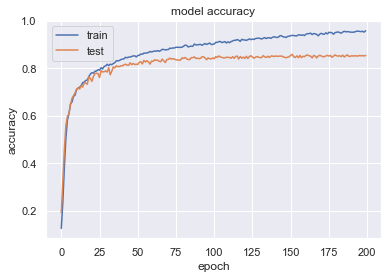

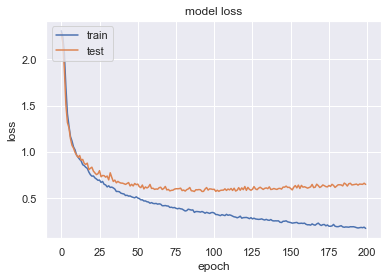

In [54]:
history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=1000,validation_data=(X_test, y_test), verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


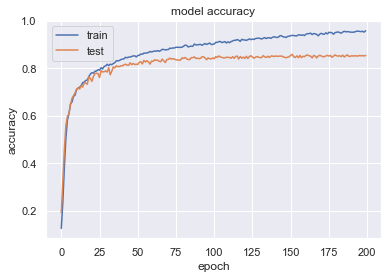

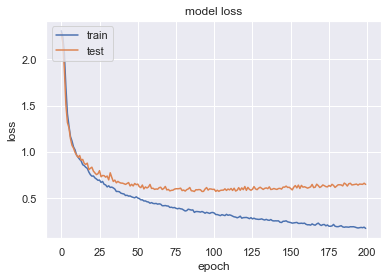

In [55]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**In the above figure we can see that after certain number of epochs, the test accuracy and loss remains constant**

**Though the train accuracy is increasing the testing accuracy is becoming constant after certain number of epochs**

**Though the train loss is decreasing the testing loss is becoming constant after certain number of epochs**

# CONCLUSION : 

**We can see that the best accuracy is arround  lr: 0.03398787390874502, Lambda: 0.00014935108033046153**

### ACCURACY : 96.17% 

### LOSS : 0.172


**We can see that after certain number of epochs, the test accuracy and loss remains constant**

**Though the train accuracy is increasing the testing accuracy is becoming constant after certain number of epochs**

**Though the train loss is decreasing the testing loss is becoming constant after certain number of epochs**

**Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.**

**Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.**

====================================================================================================================
# END 
====================================================================================================================